<a href="https://colab.research.google.com/github/fboldt/aulasml/blob/master/aula5b_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
from sklearn.datasets import load_wine
dataset = load_wine()
X, y = dataset.data, dataset.target
X.shape, y.shape

((178, 13), (178,))

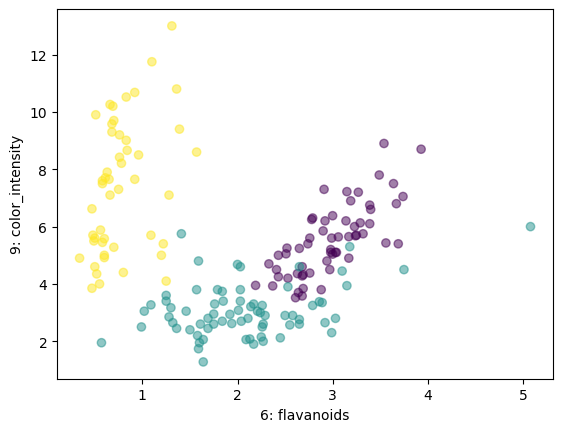

In [53]:
import matplotlib.pyplot as plt
i, j = 6, 9
Xtmp = X[:, [i, j]]
plt.scatter(Xtmp[:, 0], Xtmp[:, 1], c=y, alpha=0.5)
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        48

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



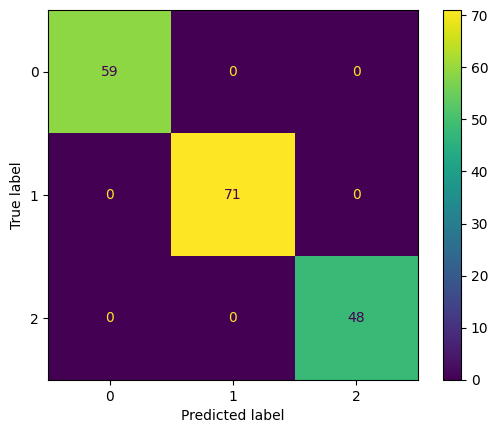

In [61]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import classification_report, confusion_matrix, \
ConfusionMatrixDisplay, precision_recall_curve, PrecisionRecallDisplay

class KNN(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    self.X_ = X
    self.y_ = y
    return self

  def distancia(self, x):
    return np.linalg.norm(self.X_ - x, axis=1)

  def predict(self, X):
    y_pred = np.empty((X.shape[0],))
    for i in range(X.shape[0]):
      distancias = self.distancia(X[i])
      vizinho = np.argmin((distancias))
      y_pred[i] = self.y_[vizinho]
    return y_pred

clf = KNN()
clf.fit(X, y)
y_pred = clf.predict(X)
print(classification_report(y, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y, y_pred)).plot()

In [58]:
def defineAxes(X):
    offset = 0.1
    min1, max1 = X[:, 0].min(), X[:, 0].max()
    min2, max2 = X[:, 1].min(), X[:, 1].max()
    return [min1-offset, max1+offset, min2-offset, max2+offset]

def plotPredictions(clf, X):
    axes = defineAxes(X)
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

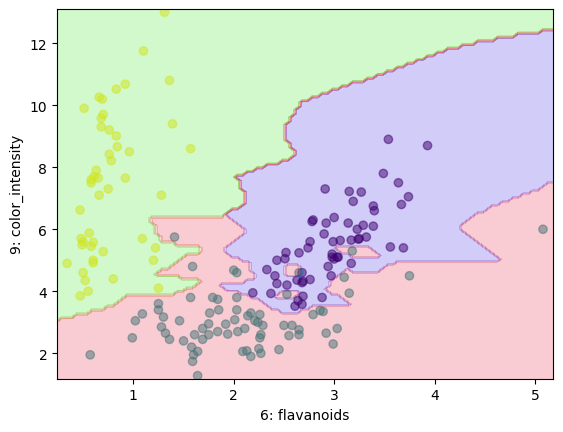

In [59]:
clf = KNN()
clf.fit(Xtmp, y)
y_pred = clf.predict(Xtmp)
plt.scatter(Xtmp[:, 0], Xtmp[:, 1], c=y, alpha=0.5)
colors = ['green', 'blue', 'red']
plotPredictions(clf, Xtmp)
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
plt.show()


In [62]:
from sklearn.model_selection import cross_validate
scores = cross_validate(clf, X, y, cv=5)
scores['test_score'], np.mean(scores['test_score'])

(array([0.80555556, 0.63888889, 0.66666667, 0.68571429, 0.82857143]),
 0.7250793650793651)

In [63]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
scores = cross_validate(clf, X, y, cv=5)
scores['test_score'], np.mean(scores['test_score'])

(array([0.80555556, 0.63888889, 0.66666667, 0.68571429, 0.82857143]),
 0.7250793650793651)

In [65]:
clf = KNeighborsClassifier()
scores = cross_validate(clf, X, y, cv=5)
scores['test_score'], np.mean(scores['test_score'])

(array([0.72222222, 0.66666667, 0.63888889, 0.65714286, 0.77142857]),
 0.6912698412698413)

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [67]:
### ERRADO ###
scores = cross_validate(clf, X_scaled, y, cv=5)
### ### ### ###
scores['test_score'], np.mean(scores['test_score'])

(array([0.94444444, 0.94444444, 0.97222222, 1.        , 0.91428571]),
 0.9550793650793651)

In [88]:
random_seed = 42

In [89]:
from sklearn.model_selection import train_test_split
### ERRADO ###
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=random_seed)
### ### ### ###
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       1.00      0.85      0.92        34
           2       0.92      1.00      0.96        22

    accuracy                           0.94        89
   macro avg       0.94      0.95      0.94        89
weighted avg       0.95      0.94      0.94        89



In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=random_seed)
## CORRETO ##
X_scaled = scaler.fit_transform(X_train)
clf.fit(X_scaled, y_train)
## ### ### ###
X_test_scaled = scaler.transform(X_test)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        33
           1       1.00      0.85      0.92        34
           2       0.96      1.00      0.98        22

    accuracy                           0.94        89
   macro avg       0.95      0.95      0.95        89
weighted avg       0.95      0.94      0.94        89



In [94]:
from sklearn.pipeline import make_pipeline
## CORRETO ##
clf = make_pipeline(StandardScaler(), KNeighborsClassifier())
### ### ### ###
scores = cross_validate(clf, X, y, cv=5)
scores['test_score'], np.mean(scores['test_score'])

(array([0.94444444, 0.94444444, 0.97222222, 1.        , 0.88571429]),
 0.9493650793650794)

In [102]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
scores = cross_validate(clf, X, y, cv=5)
scores['test_score'], np.mean(scores['test_score'])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

(array([0.88888889, 0.94444444, 0.94444444, 1.        , 1.        ]),
 0.9555555555555555)

In [103]:
### ERRADO ###
scores = cross_validate(clf, scaler.fit_transform(X), y, cv=5)
### ### ### ###
scores['test_score'], np.mean(scores['test_score'])

(array([0.97222222, 0.97222222, 1.        , 1.        , 1.        ]),
 0.9888888888888889)

In [104]:
clf = make_pipeline(StandardScaler(), LogisticRegression())
scores = cross_validate(clf, X, y, cv=5)
scores['test_score'], np.mean(scores['test_score'])

(array([0.97222222, 0.97222222, 1.        , 0.97142857, 1.        ]),
 0.9831746031746033)